/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


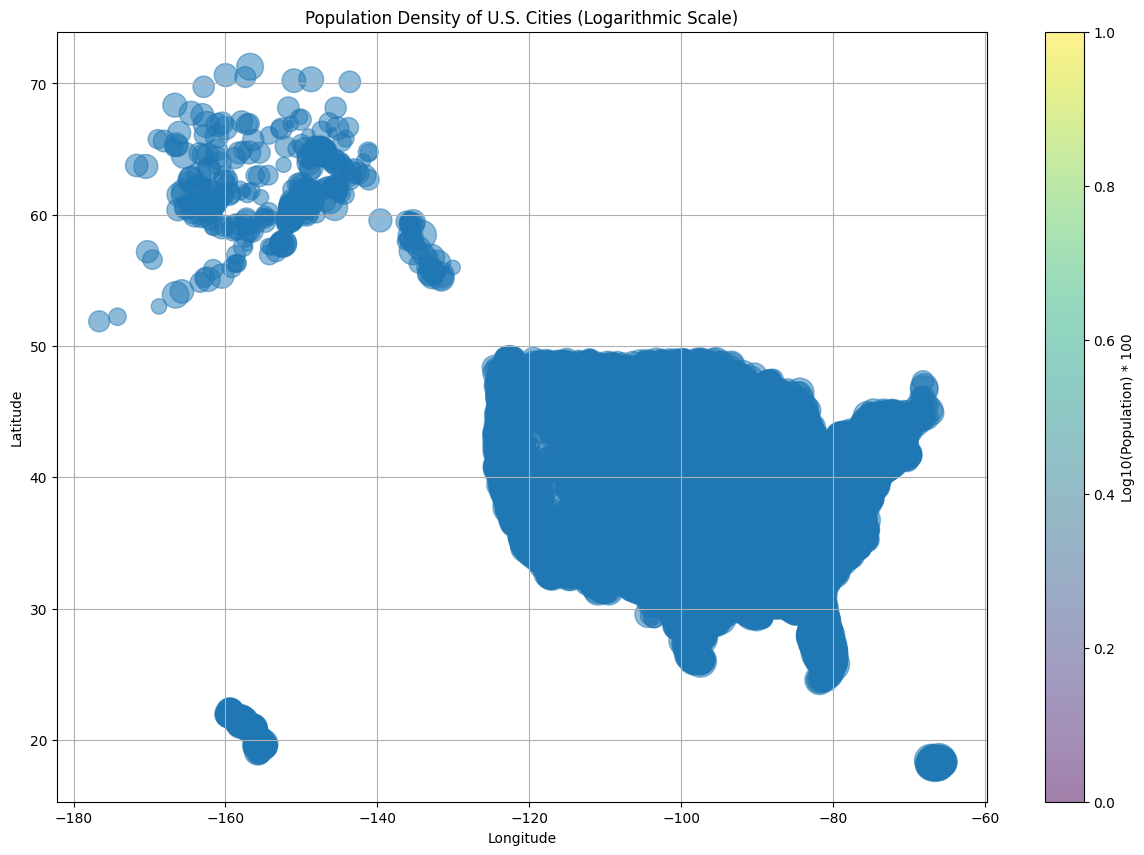

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('uscities_cleaned.csv')


data['population_scaled'] = np.log10(data['population']) * 100

plt.figure(figsize=(15, 10))
plt.scatter(data['lng'], data['lat'], s=data['population_scaled'], alpha=0.5)

plt.title('Population Density of U.S. Cities (Logarithmic Scale)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Log10(Population) * 100')
plt.grid(True)


plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


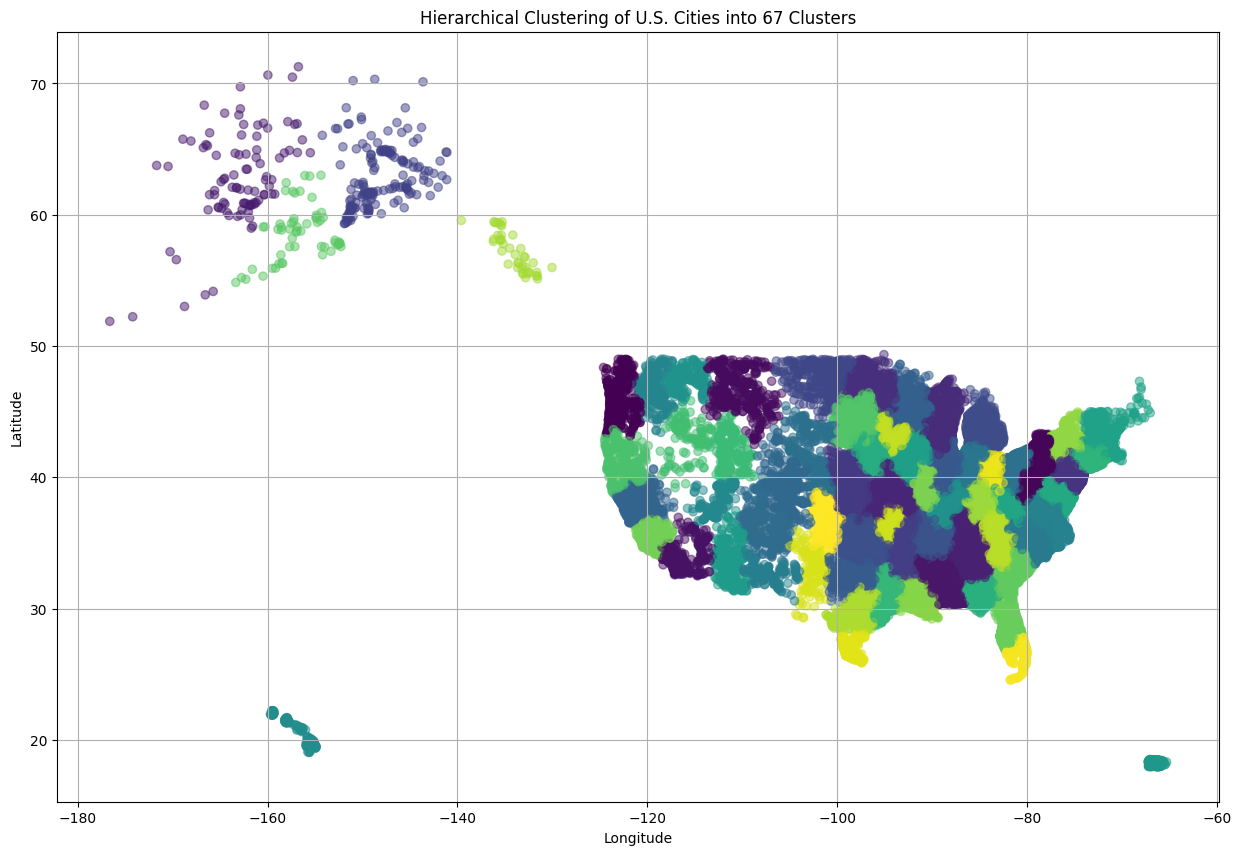

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt



# Using the coords for clustering
coordinates = data[['lat', 'lng']]

# making the linkage matrix using Ward's method
Z = linkage(coordinates, method='ward')

# doing the Agglomerative Clustering
agglom = AgglomerativeClustering(n_clusters=67, affinity='euclidean', linkage='ward')
data['cluster'] = agglom.fit_predict(coordinates)

# Plotting
plt.figure(figsize=(15, 10))
plt.scatter(data['lng'], data['lat'], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.title('Hierarchical Clustering of U.S. Cities into 67 Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


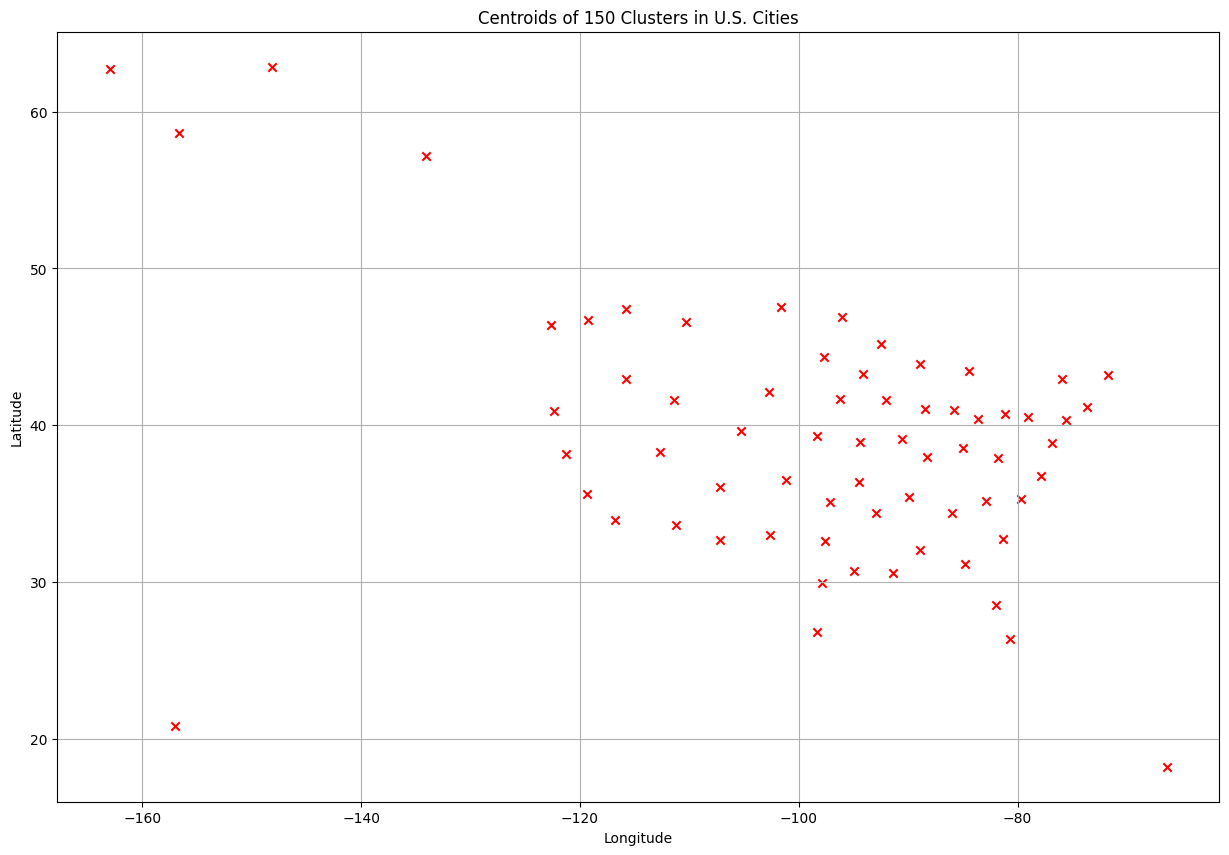

In [ ]:
# find the centroids of each cluster
centroids = data.groupby('cluster')[['lat', 'lng']].mean()

# dictionary to store centroid positions
centroid_positions = {}

# Iterate through centroids and store their positions
for i, row in centroids.iterrows():
    centroid_positions[i] = {'lat': row['lat'], 'lng': row['lng']}

plt.figure(figsize=(15, 10))
plt.scatter(centroids['lng'], centroids['lat'], c='red', marker='x')
plt.title('Centroids of 150 Clusters in U.S. Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

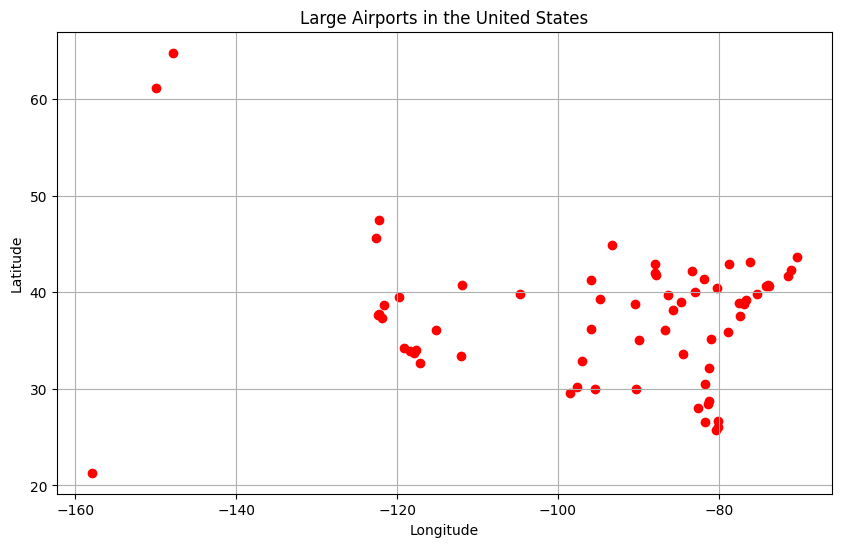

Total number of large airports in the US: 67


In [ ]:
# Load the dataset
df = pd.read_csv('airports.csv')

# Filter for 'large_airport'
large_airports = df[df['type'] == 'large_airport']

# Filter for airports in the US
us_large_airports = large_airports[large_airports['iso_country'] == 'US']

# dictionary to store airport positions
airport_positions = {}

for i, row in us_large_airports.iterrows():
    airport_positions[i] = {'lat': row['latitude_deg'], 'lng': row['longitude_deg']}

plt.figure(figsize=(10, 6))
plt.scatter(us_large_airports['longitude_deg'], us_large_airports['latitude_deg'], color='red', marker='o')
plt.title('Large Airports in the United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

print(f"Total number of large airports in the US: {len(us_large_airports)}")


In [ ]:
# Function to calculate the Haversine distance between two latitude-longitude points
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    a = (np.sin(dLat / 2) * np.sin(dLat / 2) +
         np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) *
         np.sin(dLon / 2) * np.sin(dLon / 2))
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    d = R * c
    return d

#  find the nearest airport for each centroid
def find_nearest_airport_distance(centroid, airport_positions):
    min_distance = float('inf')  # Initialize with infinity
    for airport in airport_positions.values():
        distance = haversine(centroid['lat'], centroid['lng'],
                             airport['lat'], airport['lng'])
        if distance < min_distance:
            min_distance = distance
    return min_distance

# Calculate the distance from each centroid to the nearest airport
distances = []
for centroid in centroid_positions.values():
    distance = find_nearest_airport_distance(centroid, airport_positions)
    distances.append(distance)

# Calculate the average distance to the nearest airport
average_distance = sum(distances) / len(distances)
print(f"The average distance from centroids to the nearest large airport is {average_distance:.2f} km.")


The average distance from centroids to the nearest large airport is 236.28 km.
